In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
#Creating the model using the sequential API

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 172us/sample - loss: 0.7046 - accuracy: 0.7696 - val_loss: 0.5405 - val_accuracy: 0.8222
Epoch 2/30
55000/55000 [==============================] - 8s 145us/sample - loss: 0.4880 - accuracy: 0.8302 - val_loss: 0.4391 - val_accuracy: 0.8502
Epoch 3/30
55000/55000 [==============================] - 8s 144us/sample - loss: 0.4421 - accuracy: 0.8454 - val_loss: 0.4154 - val_accuracy: 0.8584
Epoch 4/30
55000/55000 [==============================] - 8s 143us/sample - loss: 0.4136 - accuracy: 0.8543 - val_loss: 0.4113 - val_accuracy: 0.8572
Epoch 5/30
55000/55000 [==============================] - 8s 144us/sample - loss: 0.3938 - accuracy: 0.8619 - val_loss: 0.3962 - val_accuracy: 0.8642
Epoch 6/30
55000/55000 [==============================] - 8s 144us/sample - loss: 0.3782 - accuracy: 0.8668 - val_loss: 0.3822 - val_accuracy: 0.8706
Epoch 7/30
55000/55000 [===========================

In [10]:
history.history

{'loss': [0.7045720200105147,
  0.48799199067896065,
  0.4421143698605624,
  0.4135858899896795,
  0.3937616842703386,
  0.3781713010744615,
  0.3651035567110235,
  0.3528050876227292,
  0.3429243688800118,
  0.33348739684278317,
  0.32478987239057366,
  0.3177825220259753,
  0.3088893120072105,
  0.30243145795735443,
  0.29572631414370104,
  0.29005615248355,
  0.28393929699117487,
  0.27895802196155894,
  0.27413846987160767,
  0.26914630176804283,
  0.2640401704983278,
  0.2594473443443125,
  0.2542937115951018,
  0.24977755859656767,
  0.24533046372803774,
  0.2413933372779326,
  0.23784387036670337,
  0.2327082916844975,
  0.22949302183389664,
  0.22567734142541884],
 'accuracy': [0.7695636,
  0.8302,
  0.8453636,
  0.85434544,
  0.86194545,
  0.86678183,
  0.8715818,
  0.87436366,
  0.8774545,
  0.88125455,
  0.8846909,
  0.88698184,
  0.8899091,
  0.8915091,
  0.8935091,
  0.8956364,
  0.89674544,
  0.89903635,
  0.90114546,
  0.9026545,
  0.9047091,
  0.90614545,
  0.9073091,
 

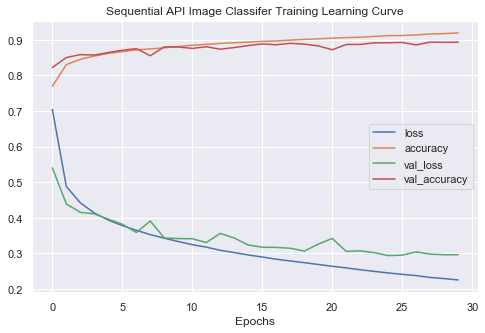

In [18]:
#Creating learning curves using the model's history.history dictionary

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Sequential API Image Classifer Training Learning Curve")
plt.xlabel("Epochs")
sns.set(style="darkgrid");

In [19]:
#Evaluating on the test set to estimate the generalization error

model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[67.68316538543701, 0.838]

In [20]:
#Predictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

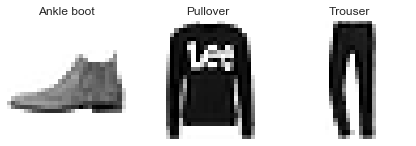

In [22]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()